# **Israel Elections Data Analysis**

An example notebook showing how to compare the Israel 2020 elections and 2019b elections results. 

In [8]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

# Import modules 
import sys
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)
from matplotlib import pyplot as plt


Running locally on Jupyter


First, we need to mount our local drive to the colab network

In [9]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/Or Zuk/Google Drive/HUJI/Teaching/Lab_52568/Data/Elections/"  


In [10]:
# Loading elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

In [17]:
from elections_functions import * # import from local file
import io

data_type = "ballot" # "ballot"  # city
df_2020, df_2020_raw = read_election_results("2020", data_type, run_in_colab)
df_2019b, df_2019b_raw = read_election_results("2019b", data_type, run_in_colab)

# Dataset is now stored in a Pandas Dataframe
print(df_2020_raw.columns)
df_2020.head()


Index(['סמל ועדה', 'ברזל', 'סמל ישוב', 'קלפי', 'ריכוז', 'שופט', 'בזב',
       'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ג', 'ודעם', 'ז', 'זך', 'זץ', 'טב',
       'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ', 'כן', 'ל', 'מחל', 'נ', 'נז',
       'ני', 'נץ', 'נק', 'פה', 'ףז', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'שס',
       'Unnamed: 41'],
      dtype='object')


,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,2,0,112,0,0,0,0,0,0,0,...,0,6,1,0,0,0,0,0,2,NaN
אבו גווייעד שבט,6,0,235,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,NaN
אבו גווייעד שבט,5,0,207,0,0,0,0,0,1,0,...,0,2,1,0,0,0,0,0,0,NaN
אבו גוש,5,3,205,0,0,0,1,0,0,0,...,1,8,0,0,0,0,0,0,0,NaN
אבו גוש,6,0,260,0,0,0,0,0,0,0,...,0,17,0,0,0,0,1,1,1,NaN


In [18]:
df_2019b.head()

,אמת,ג,ודעם,ז,זכ,זן,זץ,טב,י,יז,...,פה,ףז,צ,צן,ץ,ק,קך,קץ,רק,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו ג'ווייעד (שבט),0,1,100,0,0,0,0,0,0,0,...,9,0,0,0,0,1,0,0,0,0
אבו ג'ווייעד (שבט),3,0,202,0,0,0,0,0,0,0,...,12,0,0,0,0,1,1,0,0,0
אבו ג'ווייעד (שבט),0,0,196,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
אבו גוש,8,0,194,0,0,0,0,0,0,2,...,25,0,1,0,0,0,0,0,0,5
אבו גוש,5,0,290,0,0,0,0,0,0,5,...,33,0,0,0,0,2,1,0,0,6


In [19]:
df_2020_raw.head()

,סמל ועדה,ברזל,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,כשרים,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,9870,967,1.0,1,0,585,126,2,124,...,0,6,1,0,0,0,0,0,2,NaN
אבו גווייעד שבט,18,9871,967,2.0,1,0,764,249,2,247,...,0,0,0,0,0,0,0,2,0,NaN
אבו גווייעד שבט,18,9872,967,3.0,1,0,669,220,2,218,...,0,2,1,0,0,0,0,0,0,NaN
אבו גוש,2,743,472,8.0,2,0,457,251,1,250,...,1,8,0,0,0,0,0,0,0,NaN
אבו גוש,2,742,472,7.0,1,0,562,320,1,319,...,0,17,0,0,0,0,1,1,1,NaN


In [20]:
df_2019b_raw.head()

,סמל ועדה,ברזל,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,כשרים,...,פה,ףז,צ,צן,ץ,ק,קך,קץ,רק,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו ג'ווייעד (שבט),18,9797,967,1.0,1,0,559,113,2,111,...,9,0,0,0,0,1,0,0,0,0
אבו ג'ווייעד (שבט),18,9798,967,2.0,1,0,751,224,1,223,...,12,0,0,0,0,1,1,0,0,0
אבו ג'ווייעד (שבט),18,9799,967,3.0,1,0,651,205,6,199,...,1,0,0,0,0,1,0,0,0,0
אבו גוש,2,733,472,1.0,1,0,525,268,3,265,...,25,0,1,0,0,0,0,0,0,5
אבו גוש,2,734,472,2.0,1,0,686,363,6,357,...,33,0,0,0,0,2,1,0,0,6


Now let's do some plotting

Next, we create a function for showing a bar plot of the voting **percentage** in a given city, while showing only the parties above a % threshold 

<AxesSubplot:title={'center':'2019b'}>

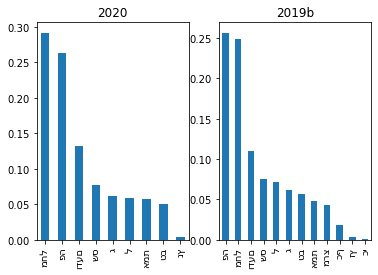

In [15]:
# Compute votes share only for parties above a certain threshold 
#def parties_votes_percents(df, thresh):
#    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
#    return par[par > thresh]

fig, axs = plt.subplots(1,2)
total_votes_2020 = parties_votes(df_2020, 0.001)  # total votes for each party
total_votes_2020.plot.bar(ax=axs[0], title="2020")
total_votes_2019b = parties_votes(df_2019b, 0.001)  # total votes for each party
total_votes_2019b.plot.bar(ax=axs[1], title="2019b")



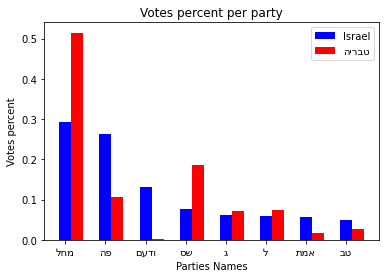

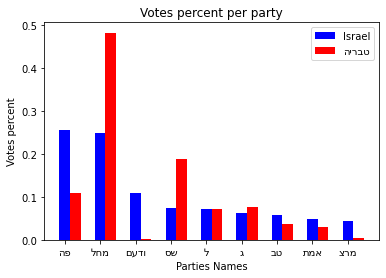

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Votes percent per party'}, xlabel='Parties Names', ylabel='Votes percent'>)

In [16]:
# Bar plot for a party, only showing values above a certain threshold
party_bar(df_2020, 0.0325, 'טבריה')
party_bar(df_2019b, 0.0325, 'טבריה')

Next, we want to compare two elections at the level of a single city or ballot, by merging the two data frames

In [22]:
# Merge the data frames and start comparison 
# ....
